<a href="https://colab.research.google.com/github/VinothiniRamsingh/restaurant_revenue/blob/main/int_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Restaurant Revenue Prediction**

#Problem Statement:
#Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset

In [1]:
import pandas as pd
import numpy as np

In [5]:
#Load the dataset
df = pd.read_csv('/content/revenue_prediction.csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [20]:
df['Id']

0     101
1     102
2     103
3     104
4     105
     ... 
95    196
96    197
97    198
98    199
99    200
Name: Id, Length: 100, dtype: int64

#Predicting the restaurant revenue based on the independent features using Random Forest Regressor (since the target variable is continuous numeric variable)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Select independent features
X = df[['Id', 'No_Of_Item', 'Order_Placed']]

# Target variable
y = df['Revenue']

In [50]:
# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 355199985869.5875
R-squared (R2) Score: 82.32822263790322


#Categorizing target variable 'Revenue' into classes and predicting restaurant revenue using Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define revenue classes based on thresholds
df['Revenue_Class'] = pd.cut(df['Revenue'], bins=[0, 500000, 1000000, float('inf')], labels=['Low', 'Medium', 'High'])

# Select features
X = df[['Id', 'No_Of_Item', 'Order_Placed']]

# Target variable
y = df['Revenue_Class']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

In [43]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [44]:
# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[30]]


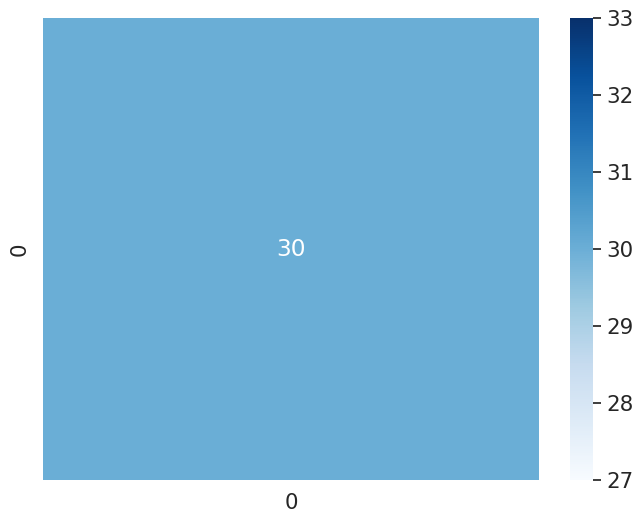

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()